We will first need to import NumPy and Pandas.

In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

from sklearn import metrics
from statistics import NormalDist

In [2]:
sys.version

'3.8.2 (default, Mar 26 2020, 15:53:00) \n[GCC 7.3.0]'

Define a function called "nor_dist_gen" that will create normal distribustion curves given three parameters; mean, standard deviation, and sample size.

In [3]:
def nor_dist_gen(mean, sd, n):
    return np.random.normal(mean, sd, n)  

Sometimes the data is expressed as mean with standard error (SE) or 95% confidence interval (CI). The standard deviation (SD) can be calculated with the following functions. 

In [4]:
def se_to_sd(se, n):
    return se*math.sqrt(n) 

In [5]:
def ci_to_sd(lower_limit, upper_limit, n):
    return math.sqrt(n)*(upper_limit - lower_limit)/3.92 

Now let's generate the plots.

In [6]:
# Example 1: FTO rs9939609 TT genotype
mean_tt = 24.12 #kg/m^2
sd_tt = 3.87 #kg/m^2
n_tt = 1000
s_tt = nor_dist_gen(mean_tt, sd_tt, n_tt) 

In [7]:
# Verify the mean and standard deviation
abs(mean_tt - np.mean(s_tt)) < 0.25
abs(sd_tt - np.std(s_tt, ddof=1)) < 0.25

True

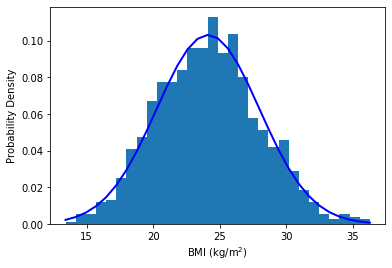

In [8]:
# Display the histogram of the samples, along with the probability density function
count, bins_tt, ignored = plt.hist(s_tt, 30, density=True)
ax1 = plt.plot(bins_tt, 1/(sd_tt * np.sqrt(2 * np.pi)) * np.exp( - (bins_tt - mean_tt)**2 / (2 * sd_tt**2)),linewidth=2, color='b')
plt.xlabel('BMI (kg/m$^2$)')
plt.ylabel('Probability Density')
plt.show() 

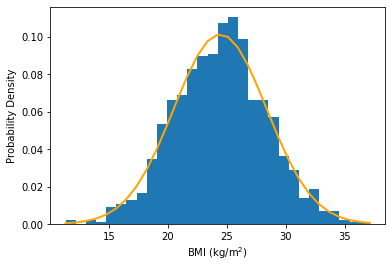

In [9]:
# Repeat for AT genotype
mean_at = 24.43 #kg/m^2
sd_at = 3.94 #kg/m^2
n_at = 1000
s_at = nor_dist_gen(mean_at, sd_at, n_at)
count, bins_at, ignored = plt.hist(s_at, 30, density=True)
ax2 = plt.plot(bins_at, 1/(sd_at * np.sqrt(2 * np.pi)) * np.exp( - (bins_at - mean_at)**2 / (2 * sd_at**2)),linewidth=2, color='orange')
plt.xlabel('BMI (kg/m$^2$)')
plt.ylabel('Probability Density')
plt.show() 

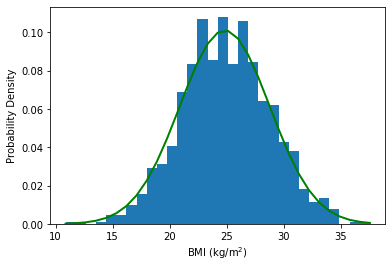

In [10]:
# Repeat for AA genotype
mean_aa = 24.82 #kg/m^2
sd_aa = 3.95 #kg/m^2
n_aa = 1000
s_aa = nor_dist_gen(mean_aa, sd_aa, n_aa)
count, bins_aa, ignored = plt.hist(s_aa, 30, density=True)
ax3 = plt.plot(bins_aa, 1/(sd_aa * np.sqrt(2 * np.pi)) * np.exp( - (bins_aa - mean_aa)**2 / (2 * sd_aa**2)),linewidth=2, color='g')
plt.xlabel('BMI (kg/m$^2$)')
plt.ylabel('Probability Density')
plt.show() 

Create violin plots for each genotype.

([<matplotlib.axis.XTick at 0x7fd884b2df70>,
 <a list of 3 Text xticklabel objects>)

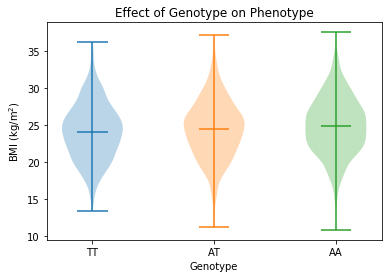

In [11]:
ax1 = plt.violinplot(s_tt, positions=[1], showmeans=True)
ax2 = plt.violinplot(s_at, positions=[2], showmeans=True)
ax3 = plt.violinplot(s_aa, positions=[3], showmeans=True)

plt.xlabel('Genotype', fontsize=10)
plt.ylabel('BMI (kg/m$^2$)', fontsize=10)
plt.title('Effect of Genotype on Phenotype')

locs, labels = plt.xticks() 
locs = [1, 2, 3]
labels = ['TT', 'AT', 'AA']
plt.xticks(locs, labels) 

Plot them all together

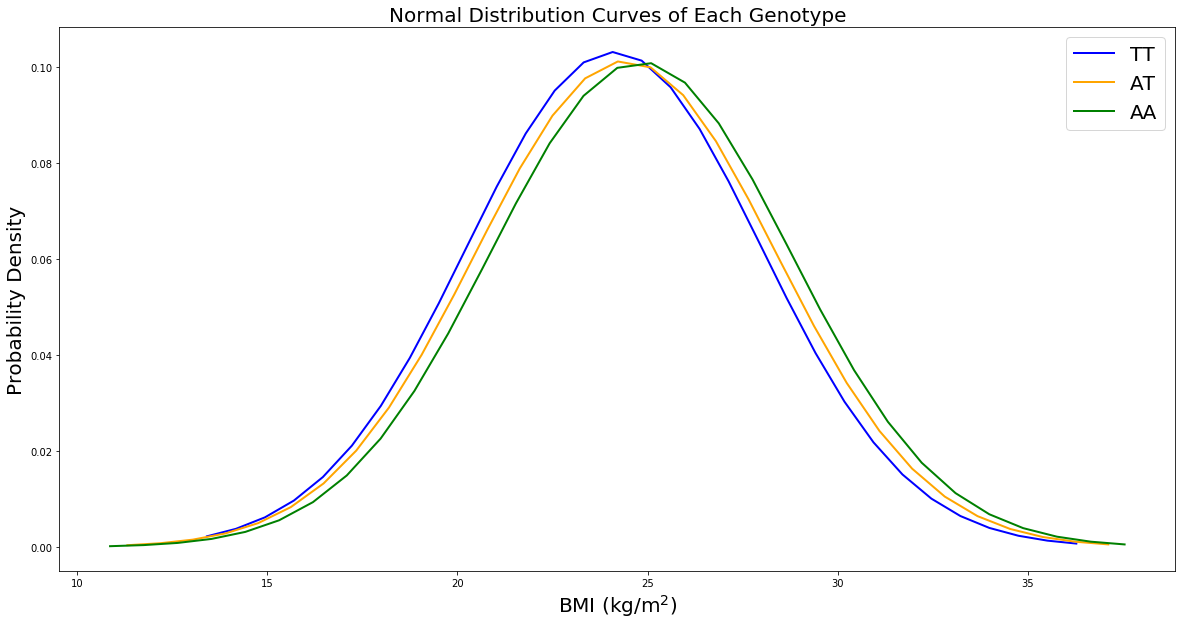

In [12]:
plt.figure(figsize=(20,10)) 

pdf_tt = 1/(sd_tt * np.sqrt(2 * np.pi)) * np.exp( - (bins_tt - mean_tt)**2 / (2 * sd_tt**2))
pdf_at = 1/(sd_at * np.sqrt(2 * np.pi)) * np.exp( - (bins_at - mean_at)**2 / (2 * sd_at**2))
pdf_aa = 1/(sd_aa * np.sqrt(2 * np.pi)) * np.exp( - (bins_aa - mean_aa)**2 / (2 * sd_aa**2))

ax1 = plt.plot(bins_tt, pdf_tt,linewidth=2, color='b', label='TT')
ax2 = plt.plot(bins_at, pdf_at,linewidth=2, color='orange', label='AT')
ax3 = plt.plot(bins_aa, pdf_aa,linewidth=2, color='g', label='AA')

plt.xlabel('BMI (kg/m$^2$)', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
plt.title('Normal Distribution Curves of Each Genotype', fontsize=20)

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

xmin1 = min(bins_tt.min(), bins_at.min())
xmax1 = max(bins_tt.max(), bins_at.max())
xmin2 = min(bins_tt.min(), bins_aa.min())
xmax2 = max(bins_tt.max(), bins_aa.max())

x1 = np.linspace(xmin1, xmax1, 31)
x2 = np.linspace(xmin2, xmax2, 31)

y1 = np.minimum(pdf_tt, pdf_at)
y2 = np.minimum(pdf_tt, pdf_aa) 

#plt.fill_between(x1, y1, color='green', alpha=0.5)
#plt.fill_between(x2, y2, color='purple', alpha=0.5)

plt.legend (fontsize=20)
plt.show() 

Define a function to alculate the area under each curve.

In [13]:
def auc(bins, pdf):
    return metrics.auc(bins, pdf) 

Calculate the area under each curve

In [14]:
# Area under TT curve
area_tt = auc(bins_tt, pdf_tt) 

In [15]:
# Area under AT curve
area_at = auc(bins_at, pdf_at) 

In [16]:
# Area under AA curve
area_aa = auc(bins_aa, pdf_aa) 

Define a function to calculate the percent overlap of each genotype curve versus the "wild" genotype TT.

In [17]:
def percent_overlap(mean_wild, sd_wild, mean_snp, sd_snp):
    return 'The likelihood of a null effect is {0:1.2%}'.format(NormalDist(mu=mean_wild, sigma=sd_wild).overlap(NormalDist(mu=mean_snp, sigma=sd_snp)))

Calculate the percent overlap of each curve versus the "wild" genotype TT.

In [18]:
# TT vs TT
percent_overlap(mean_tt, sd_tt, mean_tt, sd_tt) 

'The likelihood of a null effect is 100.00%'

In [19]:
# TT vs AT
percent_overlap(mean_tt, sd_tt, mean_at, sd_at) 

'The likelihood of a null effect is 96.76%'

In [20]:
# TT vs AA
percent_overlap(mean_tt, sd_tt, mean_aa, sd_aa)

'The likelihood of a null effect is 92.82%'